# Ceny tepla ERÚ 2017


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ceny = pd.read_csv('eru_ceny_tepla_2017.csv', usecols=range(1,33))
ceny

,lokalita,kraj,pod_uhli,pod_plyn,pod_bio,pod_olej,pod_ost,vykon,pocet_odberat,pocet_mist,...,blok_kot_czk,blok_kot_gj,sek_rozv_czk,sek_rozv_gj,dps_czk,dps_gj,dom_kot_czk,dom_kot_gj,dod_cena,dod_mnozstvi
0,Abertamy,K,0.0,1.0,0.0,0.0,0.0,0.810,3,2,...,575.22,1311.0,0.0,0.0,0.00,0.0,0.00,0.0,575.22,1979.0
1,Adamov,B,0.0,1.0,0.0,0.0,0.0,2.254,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,254.62,21824.0
2,Adamov - Opletalova 38 a 22,B,0.0,1.0,0.0,0.0,0.0,0.460,2,2,...,0.00,0.0,0.0,0.0,0.00,0.0,609.66,1520.0,609.66,1520.0
3,Adamov - P. Jilemnického 18 (K 72),B,0.0,1.0,0.0,0.0,0.0,0.090,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,325.22,547.0,325.22,547.0
4,Adamov - teplovodní zdroj,B,0.0,1.0,0.0,0.0,0.0,9.000,37,28,...,0.00,0.0,0.0,0.0,546.06,28987.0,0.00,0.0,546.06,28987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,Žernůvka,B,0.0,1.0,0.0,0.0,0.0,0.300,1,2,...,0.00,0.0,0.0,0.0,0.00,0.0,456.84,1307.0,456.84,1307.0
2994,Židlochovice,B,0.0,1.0,0.0,0.0,0.0,0.863,15,30,...,0.00,0.0,0.0,0.0,0.00,0.0,438.33,3521.0,438.33,3521.0
2995,Žihle - Nový Dvůr 2,P,0.0,0.0,0.0,1.0,0.0,0.063,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,826.23,24.0,826.23,24.0
2996,Žinkovy,P,0.0,1.0,0.0,0.0,0.0,0.490,1,1,...,0.00,0.0,0.0,0.0,0.00,0.0,419.46,3071.0,419.46,3071.0


In [2]:
ceny.dod_cena.describe()

count    2998.000000
mean      513.858828
std       191.527115
min         0.000000
25%       409.933730
50%       505.660000
75%       616.129302
max      5118.550000
Name: dod_cena, dtype: float64

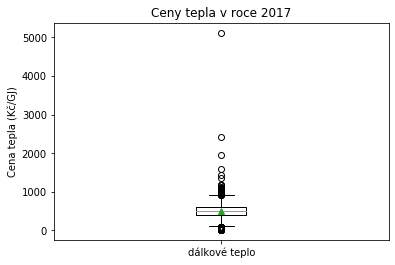

In [3]:
fig, ax = plt.subplots()
ax.boxplot(ceny.dod_cena, labels=['dálkové teplo'], showmeans=True)
ax.set_title('Ceny tepla v roce 2017')
ax.set_ylabel('Cena tepla (Kč/GJ)')
plt.show()

In [4]:
# Extrémně vysoké ceny: výroba chladu
ceny[ceny.dod_cena > 1500][['lokalita', 'dod_cena', 'dod_mnozstvi']]

,lokalita,dod_cena,dod_mnozstvi
1719,"Praha - G904, Rubešova 2576/11 - chlad",2421.38,175.0
1756,"Praha 1 - Legerova 57/75, Státní opera - chlad",1593.13,1108.0
2208,Praha 8 - Pernerova 676/51;G928 Karlín Hall 2 ...,1941.25,1339.0
2955,"Zlín - výroba chladu, stř. 235 (dvousložková c...",5118.55,258.0


In [5]:
# Nízké ceny
ceny[ceny.dod_cena < 50][['lokalita', 'dod_cena', 'dod_mnozstvi']]

,lokalita,dod_cena,dod_mnozstvi
554,Havířov - Dolní Suchá,21.24,11860.0
720,Horažďovice - Hradešice 1,41.67,3399.0
1127,Kunovice - Nový Dvůr 1675,0.00,5229.0
1277,Loučovice - průmysl,11.50,413219.0
1307,Městečko Trnávka - Pacov,0.51,1979.0
1435,Novosedly,19.75,3149.0
2484,Smiřice - ČOV,1.15,3796.0


Orientační ceny tepla podle paliva v případě, že má dané palivo 100% podíl nebo alespoň 80% podíl.

In [6]:
podily = ['pod_uhli', 'pod_plyn', 'pod_bio', 'pod_olej', 'pod_ost']
labels = ['uhlí', 'zemní plyn', 'biomasa', 'topný olej', 'jiné']

podil_100 = pd.DataFrame([ceny[ceny[podil] == 1.0]['dod_cena'] for podil in podily], index=labels)
podil_100 = podil_100.transpose()
podil_100.describe()

,uhlí,zemní plyn,biomasa,topný olej,jiné
count,59.000000,2093.000000,146.000000,25.000000,37.000000
mean,548.728284,498.742100,297.375890,780.539534,651.123981
std,133.202843,132.430445,180.234139,183.188829,929.703949
min,183.920000,135.190000,0.000000,380.000000,21.240000
25%,454.718211,410.810000,172.500000,694.030000,145.850000
50%,574.000000,491.050000,265.350000,758.490000,325.110000
75%,636.030000,581.950000,394.800000,798.230000,810.190000
max,992.300000,1184.610000,747.540000,1361.180000,5118.550000


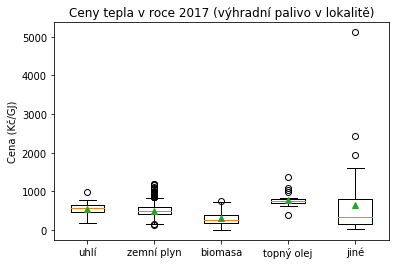

In [7]:
fig, ax = plt.subplots()
labels = ['uhlí', 'zemní plyn', 'biomasa', 'topný olej', 'jiné']
ax.set_title('Ceny tepla v roce 2017 (výhradní palivo v lokalitě)')
ax.set_ylabel('Cena (Kč/GJ)')
ax.boxplot([ceny[ceny[podil] == 1.0]['dod_cena'] for podil in podily], labels=labels, showmeans=True)
plt.show()
# fig.savefig('ceny_100pct.svg', format='svg')
# fig.savefig('ceny_100pct.png', format='png')

In [8]:
podil_80 = pd.DataFrame([ceny[ceny[podil] >= 0.8]['dod_cena'] for podil in podily], index=labels)
podil_80 = podil_80.transpose()
podil_80.describe()

,uhlí,zemní plyn,biomasa,topný olej,jiné
count,400.000000,2146.000000,180.000000,27.000000,54.000000
mean,627.248617,499.304932,328.203134,781.178026,547.290583
std,172.058297,132.207486,200.844751,176.751232,788.718993
min,183.920000,135.190000,0.000000,380.000000,21.240000
25%,522.033615,412.270000,178.110000,694.720000,152.625000
50%,632.222241,492.116412,278.500000,758.490000,319.140000
75%,729.430000,582.925000,455.092500,812.230000,616.686772
max,1432.830000,1184.610000,862.500000,1361.180000,5118.550000


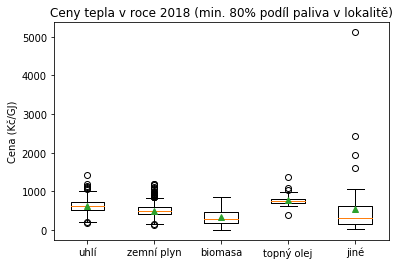

In [9]:
fig, ax = plt.subplots()
labels = ['uhlí', 'zemní plyn', 'biomasa', 'topný olej', 'jiné']
ax.set_title('Ceny tepla v roce 2018 (min. 80% podíl paliva v lokalitě)')
ax.set_ylabel('Cena (Kč/GJ)')
ax.boxplot([ceny[ceny[podil] >= 0.8]['dod_cena'] for podil in podily], labels=labels, showmeans=True)
plt.show()
# fig.savefig('ceny_80pct.svg', format='svg')
# fig.savefig('ceny_80pct.png', format='png')

In [10]:
np.sum([(ceny[podil] * ceny.dod_mnozstvi) for podil in podily])

137823248.6677

In [11]:
ceny.dod_mnozstvi.sum()

137822032.0

In [12]:
ceny.filter(regex='_gj+', axis=1).sum().sum()

137822032.0